In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the CSV file
WVS = pd.read_csv('data/data.csv')

In [4]:
# Create a new column 'happy' where certain values are replaced with NaN
WVS['happy'] = WVS['A170'].apply(lambda x: x if x not in [-5, -4, -2, -1] else pd.NA)

# Reverse the scale for the 'happy' column
# WVS['happy_transformed'] = WVS['happy'].apply(lambda x: 5 - x if pd.notna(x) else pd.NA)

# Filter out rows where 'happy_transformed' is NaN
WVS_clean = WVS.dropna(subset=['happy'])

# Group by 'COUNTRY_ALPHA', calculate the mean of 'happy_transformed' ignoring NaN values
WaveCountryAves = WVS_clean.groupby(['COUNTRY_ALPHA', 'S002VS'], as_index=False).agg(meanhappy=('happy', 'mean'))
# WaveCountryAves = WVS_clean.groupby(['COUNTRY_ALPHA'], as_index=False).agg(meanhappy=('happy_transformed', 'mean'))
# WaveCountryAves = WVS_clean.groupby(['S002VS'], as_index=False).agg(meanhappy=('happy_transformed', 'mean'))

# Display the first few rows
print(WaveCountryAves)


    COUNTRY_ALPHA  S002VS meanhappy
0             ALB       3  4.765358
1             ALB       4  5.165331
2             AND       5  7.135593
3             AND       7  7.537924
4             ARG       1  6.770021
..            ...     ...       ...
299           ZAF       6  6.678216
300           ZMB       5  6.058783
301           ZWE       4     3.945
302           ZWE       6  6.041333
303           ZWE       7  4.950577

[304 rows x 3 columns]


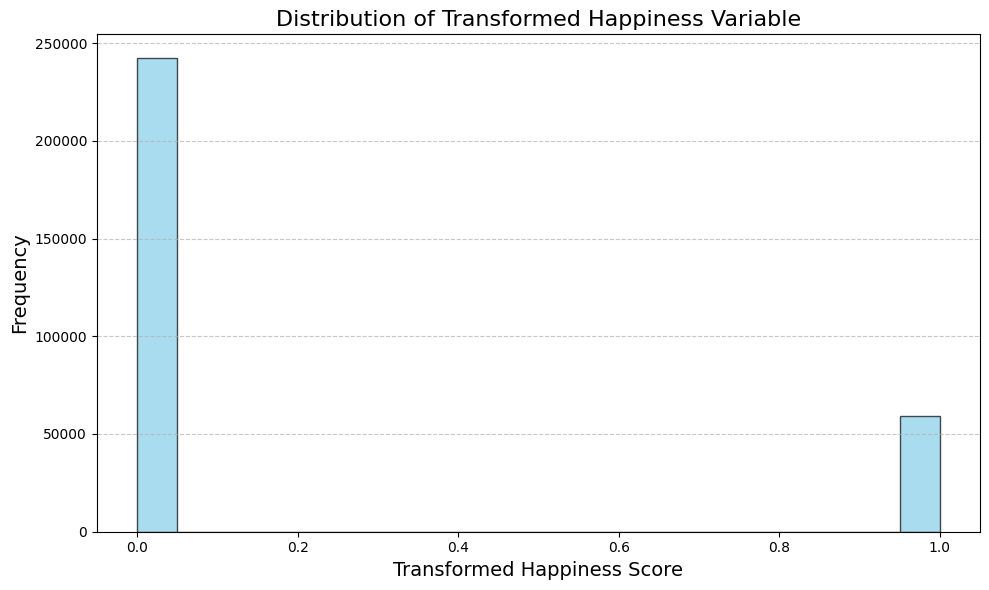

In [34]:
# Plot the distribution of the 'happy_transformed' variable
plt.figure(figsize=(10, 6))
plt.hist(WVS_clean['happy'].dropna(), bins=20, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Distribution of Transformed Happiness Variable', fontsize=16)
plt.xlabel('Transformed Happiness Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [5]:
# Filter data for specified countries using COUNTRY_ALPHA
selected_countries_alpha = ['AUS', 'CAN', 'CHN', 'RUS', 'DEU', 'LTU', 'CHE']  # ISO alpha-3 codes for Australia, Canada, China, Russia, Germany, Lithuania, Switzerland

# Assuming 'COUNTRY_ALPHA' is the column with ISO alpha-3 codes
WaveCountryAves_filtered = WaveCountryAves.query("COUNTRY_ALPHA in @selected_countries_alpha")

# Plotting
fig = px.line(
    WaveCountryAves_filtered,
    x='S002VS',
    y='meanhappy',
    color='COUNTRY_ALPHA',
    markers=True,
    labels={'S002VS': 'Survey Wave', 'meanhappy': 'Mean Happiness'},
    title='Mean Happiness by Country Across Survey Waves'
)

# Show the plot
fig.show()
